Tracking element #1 (s = 0.0 m, -0.5 nC, 10.0 GeV, SourceBasic, stage 0)
Tracking element #2 (s = 0.0 m, -0.5 nC, 10.0 GeV, BeamDeliverySystemBasic, stage 0)
Tracking element #3 (s = 1.2 m, -2.5 nC, 7.5 GeV, StageNonlinear1D, stage 1)
Tracking element #4 (s = 3.1 m, -2.5 nC, 7.5 GeV, DriftBasic, stage 1)
Tracking element #5 (s = 4.1 m, -2.5 nC, 7.5 GeV, QuadrupoleBasic, stage 1)
Tracking element #6 (s = 5.3 m, -2.5 nC, 7.5 GeV, DriftBasic, stage 1)
Tracking element #7 (s = 6.3 m, -2.5 nC, 7.5 GeV, QuadrupoleBasic, stage 1)
Tracking element #8 (s = 7.5 m, -2.5 nC, 7.5 GeV, DriftBasic, stage 1)
Tracking element #9 (s = 8.5 m, -2.5 nC, 7.5 GeV, QuadrupoleBasic, stage 1)
Tracking element #10 (s = 12.0 m, -2.5 nC, 7.5 GeV, DriftBasic, stage 1)
Tracking element #11 (s = 13.0 m, -2.5 nC, 7.5 GeV, DipoleSpectrometerBasic, stage 1)
Tracking element #12 (s = 21.8 m, -2.5 nC, 7.5 GeV, DriftBasic, stage 1)


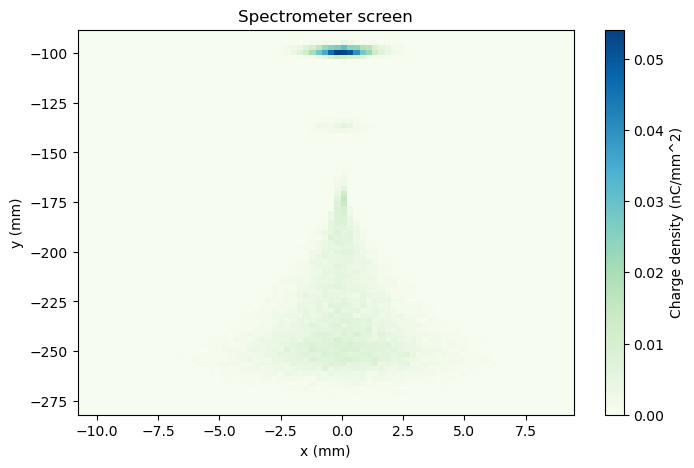

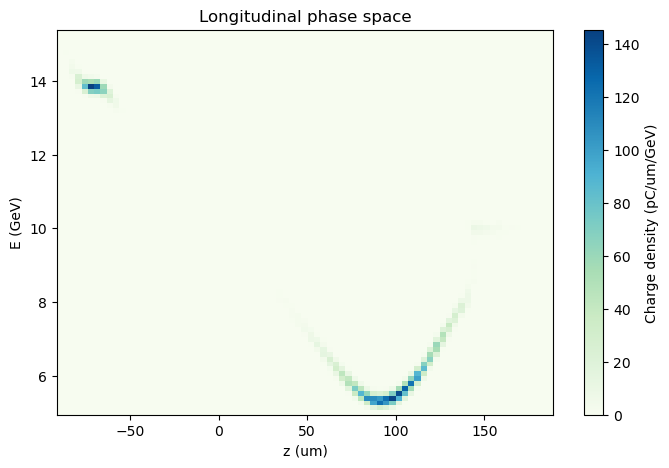

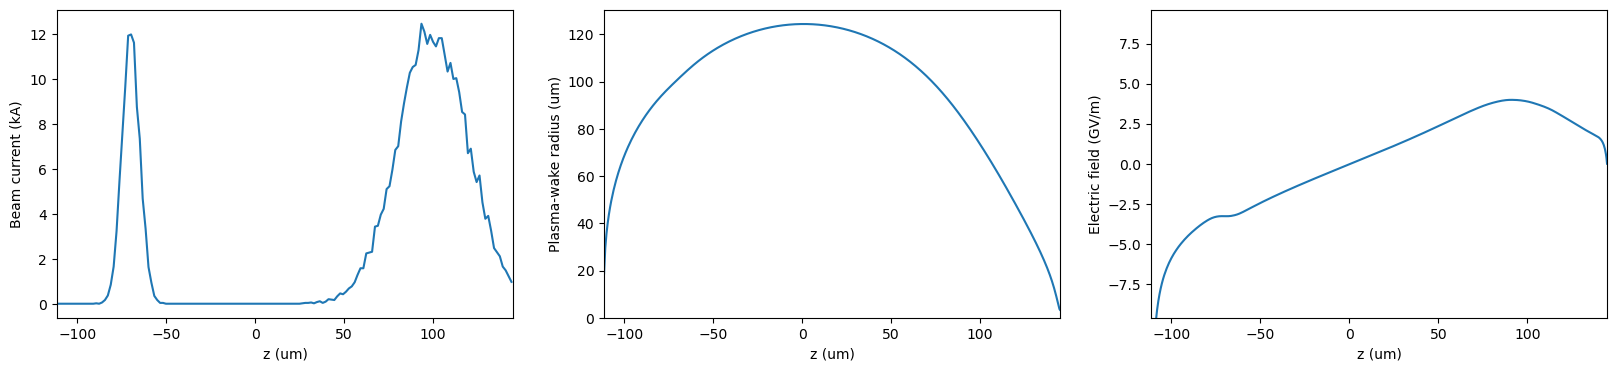

In [11]:
import sys
sys.path.append('../')
from opal import SourceBasic, SourceCombiner, StageNonlinear1D, BeamDeliverySystemBasic, SpectrometerFACET2Basic, Experiment, QuadrupoleBasic

# define witness bunch
witness = SourceBasic()
witness.Q = -0.5e-9 # [C]
witness.E0 = 10e9 # [eV]
witness.relsigE = 0.01
witness.sigz = 5e-6 # [m]
witness.z = -70e-6 # [m]
witness.emitnx, witness.emitny = 1e-6, 1e-6 # [m rad]
witness.betax, witness.betay = 20e-3, 20e-3 # [m]
witness.Npart = 5000

# define drive bunch
driver = SourceBasic()
driver.Q = -2e-9 # [C]
driver.E0 = witness.E0 # [eV]
driver.relsigE = 0.01
driver.sigz = 20e-6 # [m]
driver.z = 100e-6 # [m]
driver.emitnx, driver.emitny = 10e-6, 10e-6 # [m rad]
driver.betax, driver.betay = 50e-3, 50e-3 # [m]
driver.Npart = 20000

# define beamline
bds = BeamDeliverySystemBasic()
bds.beta_waist_x = witness.betax # [m]
bds.beta_waist_y = witness.betay # [m]

# define stage
stage = StageNonlinear1D()
stage.driverSource = driver
stage.L = 1.17 # [m]
stage.n0 = 1e22 # [m^-3]
stage.addDriverToBeam = True

# define spectrometer
spectrometer = SpectrometerFACET2Basic()
spectrometer.B_dip = 0.5 # [T]
spectrometer.s_obj = 0.00 # [m]
spectrometer.mag_x = -8 # 
spectrometer.E_img = 8e9
spectrometer.setImaging()

# define experiment
experiment = Experiment(witness, bds, stage, spectrometer)
beam = experiment.run("FACET-II")

# see output
experiment.plotSpectrometerScreen()
beam.plotLPS()
stage.plotWakefield(witness.track())